In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
col_names = []
pima  =  pd.read_csv('diabetes.csv')
pima.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#feature_cols =['time_pregnant_no','plasma_concentration','diastolic_blood_pressure','triceps_skinfold_thickness','serum_insulin','bmi','diabetes_pedigree','age']

X = pima.drop('class',axis=1)
y=pima['class']


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler =StandardScaler()
X_scaled =scaler.fit_transform(X)

In [4]:
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,stratify=y,test_size=0.30,random_state=42)

In [5]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7619047619047619


In [7]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [8]:
feature_cols =['time_pregnant_no','plasma_concentration','diastolic_blood_pressure','triceps_skinfold_thickness','serum_insulin','bmi','diabetes_pedigree','age']


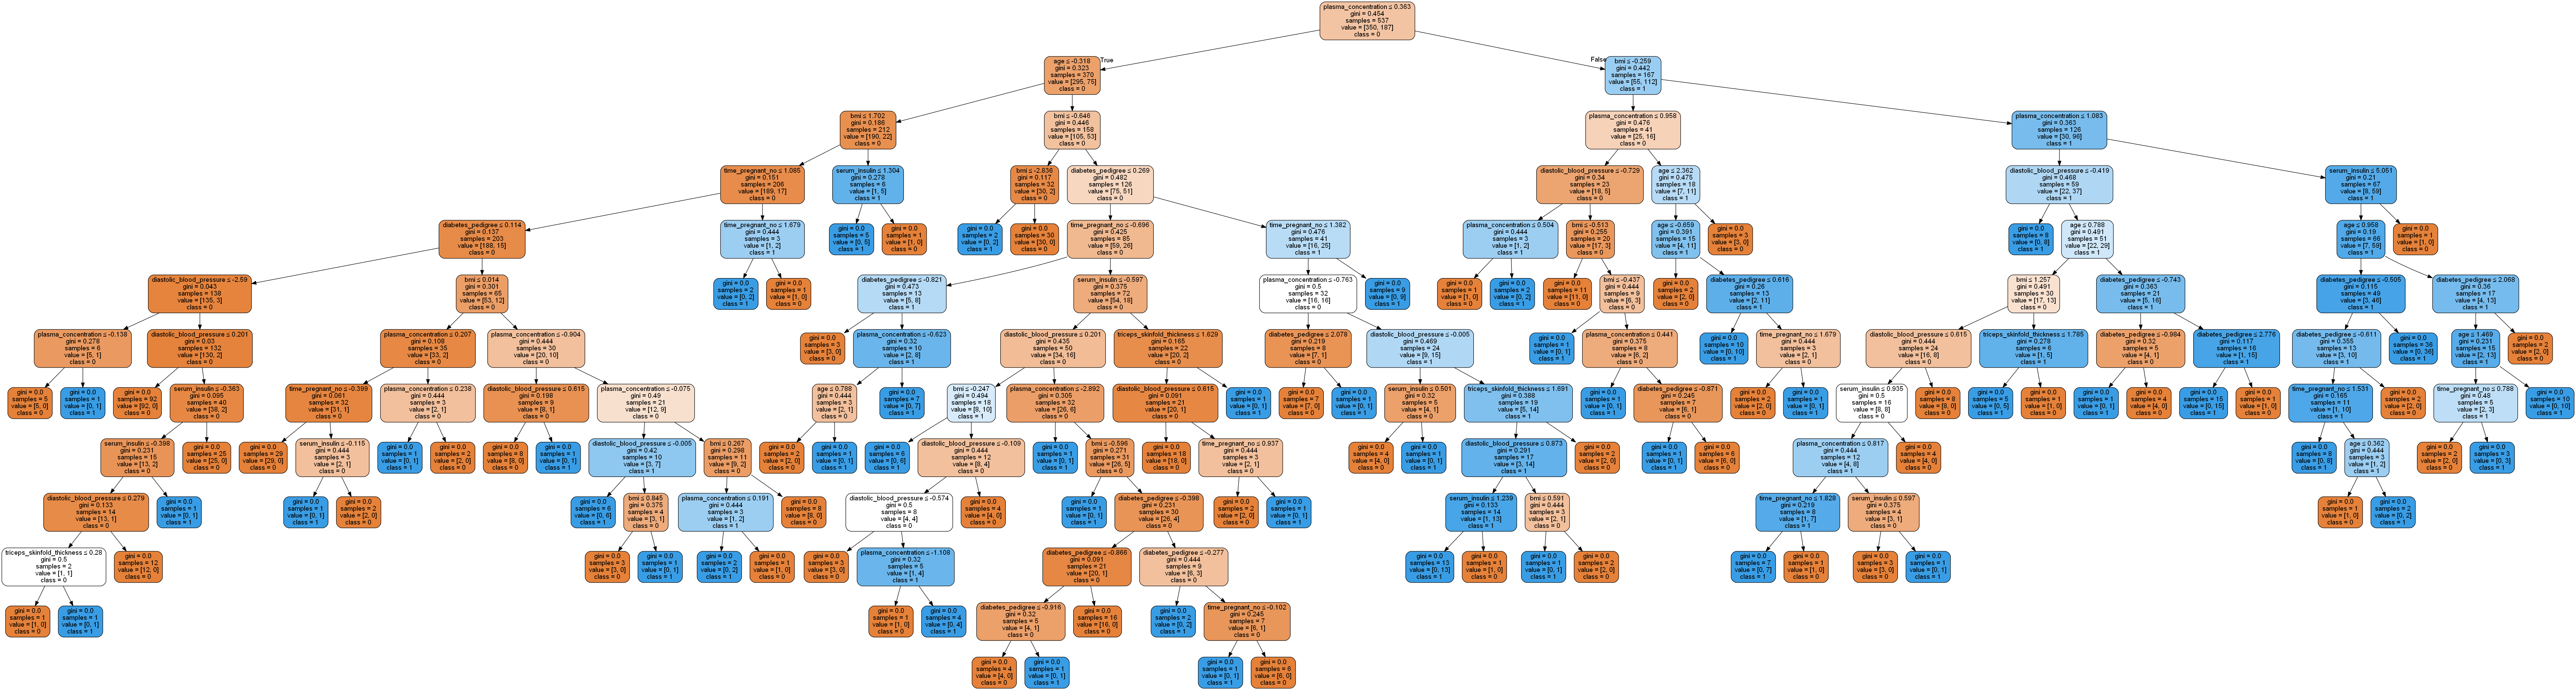

In [9]:
dot_data = StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('dt.png')
Image(graph.create_png())

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7272727272727273


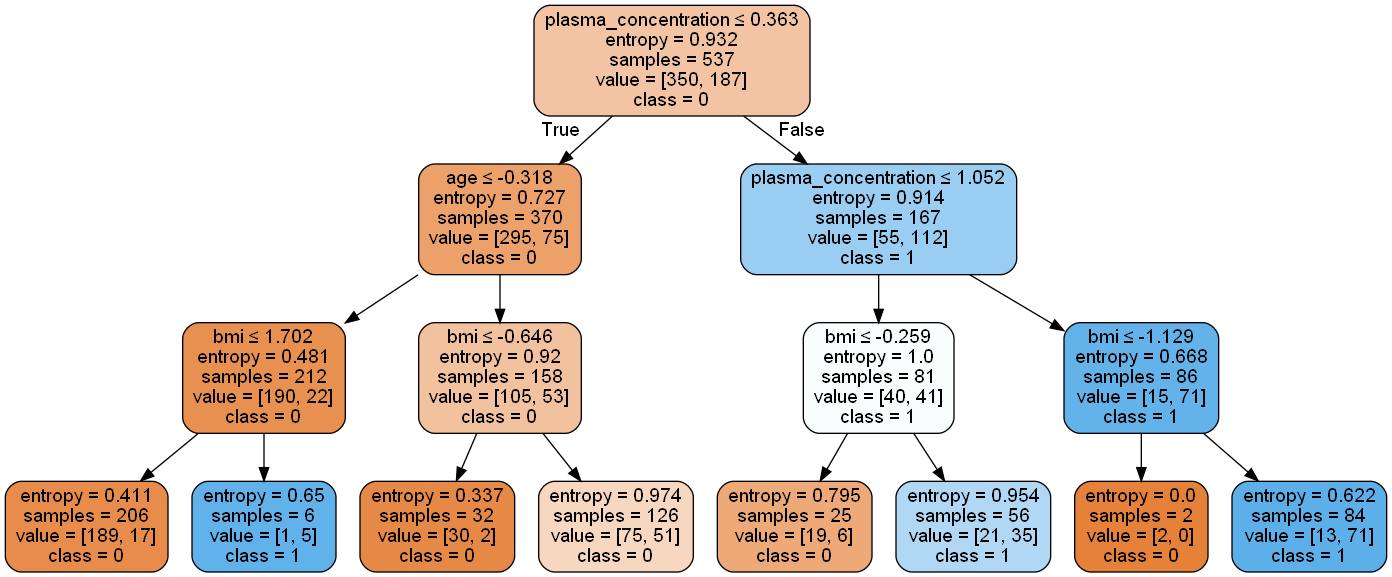

In [12]:
dot_data = StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('dt1.png')
Image(graph.create_png())